In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
# Cargar los datos
data = pd.read_csv('WineQT.csv')

# Mostrar las primeras filas del DataFrame
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [122]:
# Get basic information
print(data.info())

# Check and ensure running
print("The task has been completed without any errors....")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
The task has been completed without any errors....


In [123]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.31,1.75,4.60,7.10,7.90,9.10,15.90
volatile acidity,1143.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1143.0,0.27,0.20,0.00,0.09,0.25,0.42,1.00
residual sugar,1143.0,2.53,1.36,0.90,1.90,2.20,2.60,15.50
chlorides,1143.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1143.0,15.62,10.25,1.00,7.00,13.00,21.00,68.00
total sulfur dioxide,1143.0,45.91,32.78,6.00,21.00,37.00,61.00,289.00
density,1143.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1143.0,3.31,0.16,2.74,3.20,3.31,3.40,4.01
sulphates,1143.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [124]:
print(data['quality'].unique())


[5 6 7 4 8 3]


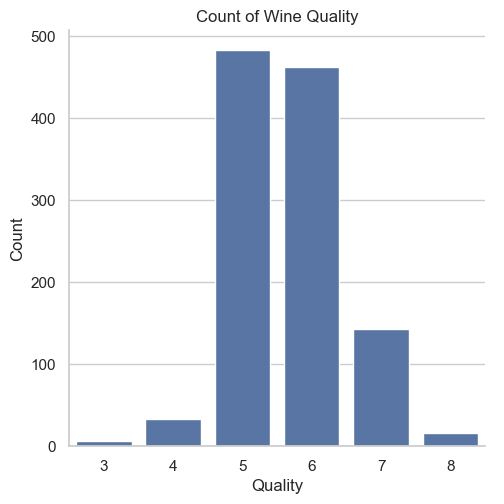

In [125]:
sns.catplot(data=data, x='quality', kind='count')

plt.title('Count of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.show()


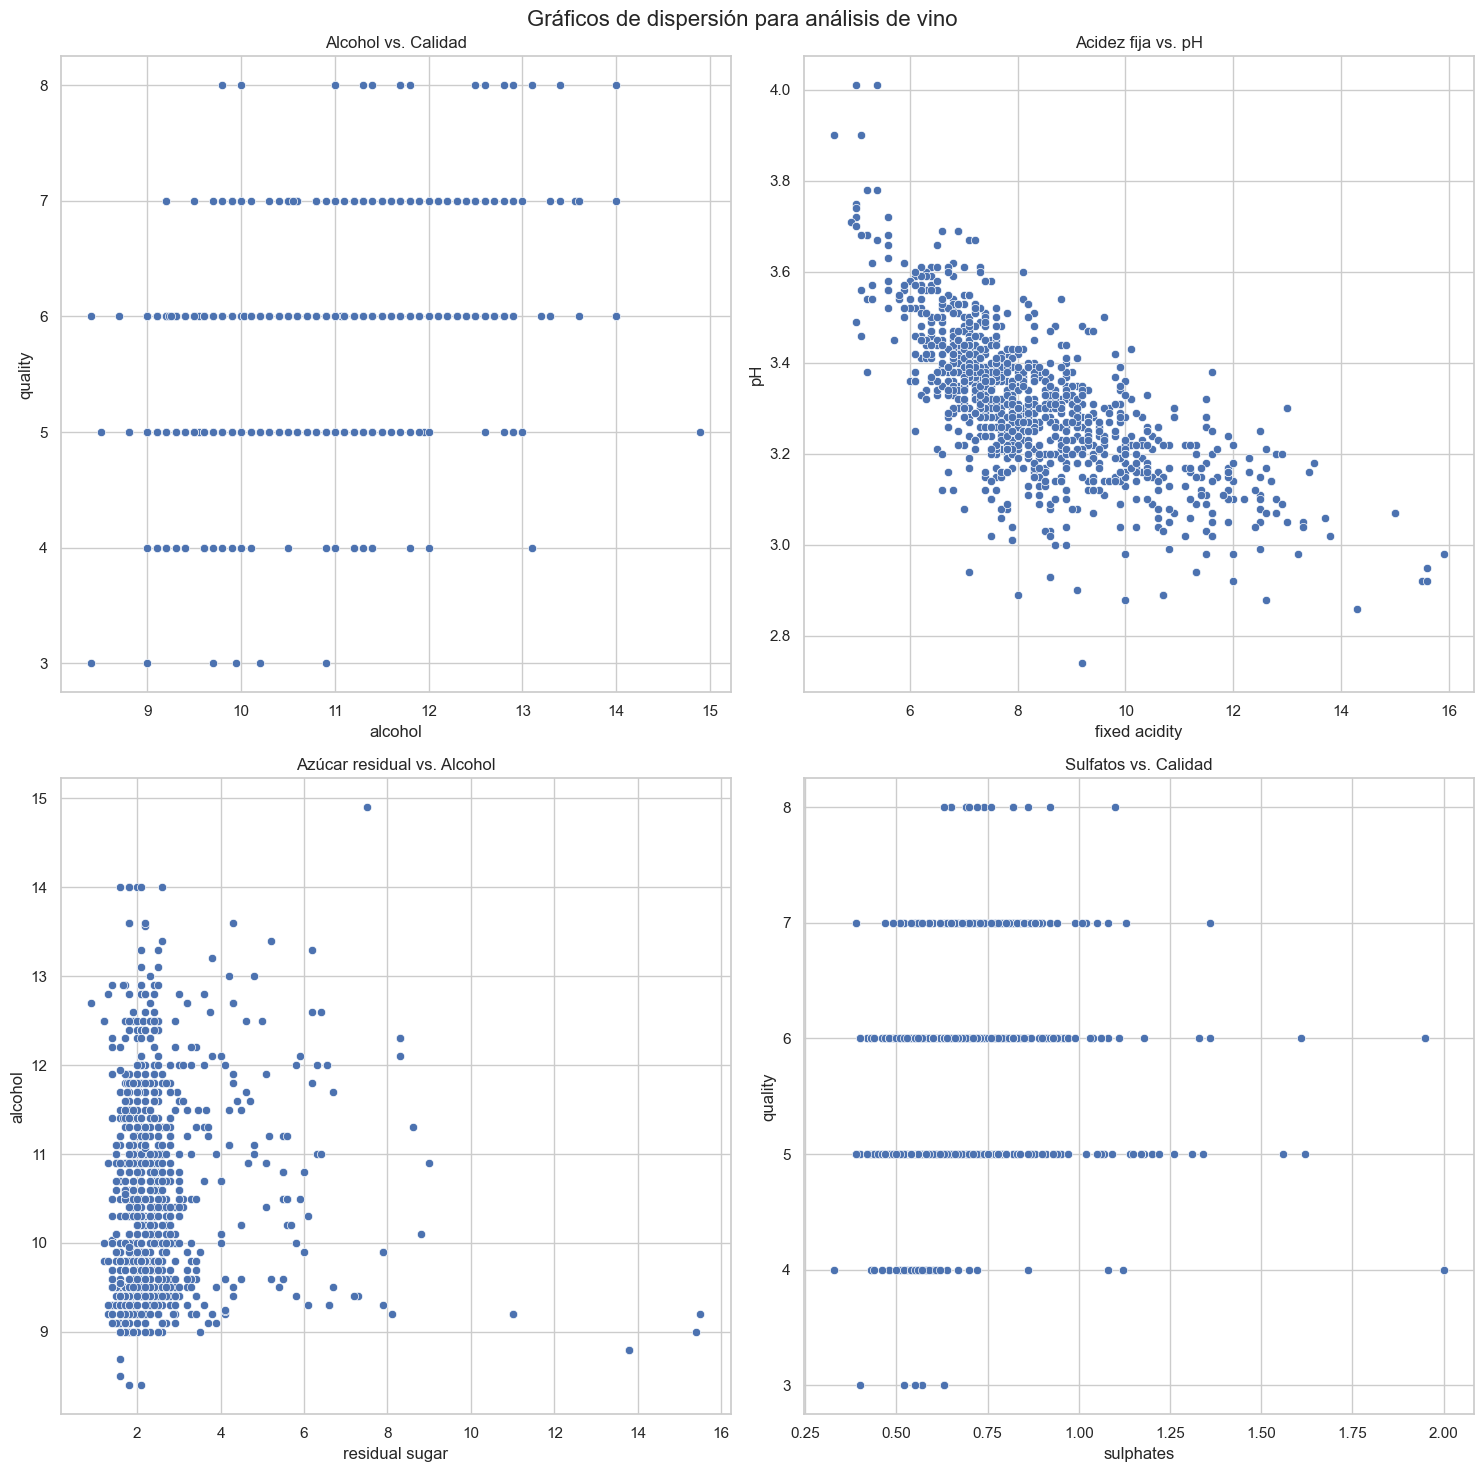

In [126]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Gráficos de dispersión para análisis de vino', fontsize=16)

# Gráfico 1: Alcohol vs. Calidad
sns.scatterplot(data=data, x='alcohol', y='quality', ax=axes[0, 0])
axes[0, 0].set_title('Alcohol vs. Calidad')

# Gráfico 2: Acidez fija vs. pH
sns.scatterplot(data=data, x='fixed acidity', y='pH', ax=axes[0, 1])
axes[0, 1].set_title('Acidez fija vs. pH')

# Gráfico 3: Azúcar residual vs. Alcohol
sns.scatterplot(data=data, x='residual sugar', y='alcohol', ax=axes[1, 0])
axes[1, 0].set_title('Azúcar residual vs. Alcohol')

# Gráfico 4: Sulfatos vs. Calidad
sns.scatterplot(data=data, x='sulphates', y='quality', ax=axes[1, 1])
axes[1, 1].set_title('Sulfatos vs. Calidad')

plt.tight_layout()
plt.show()

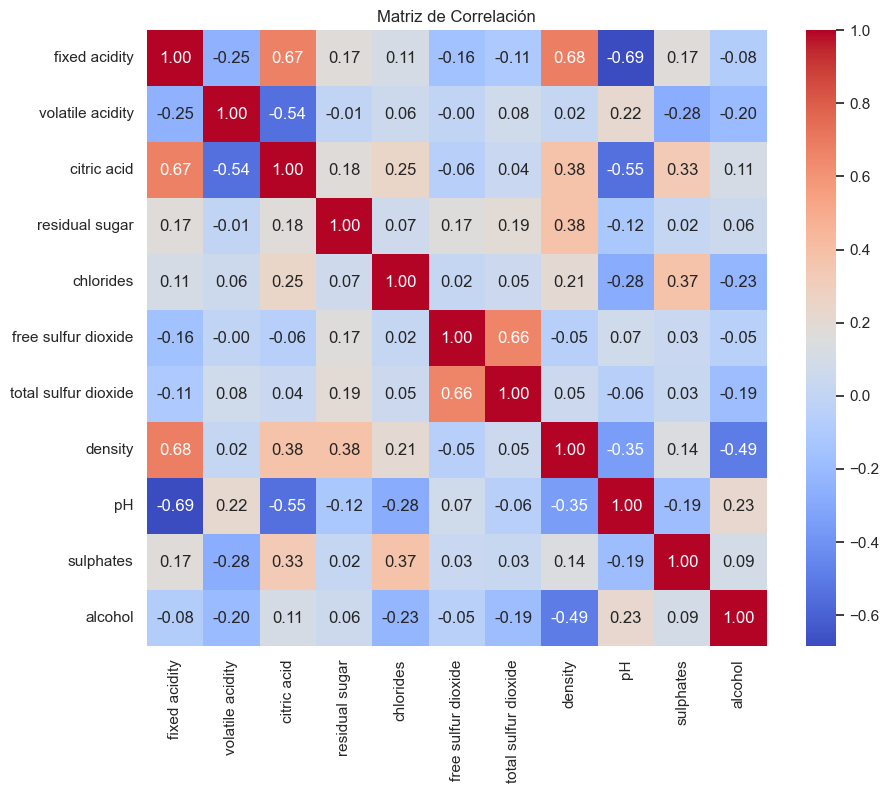

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir columnas no numéricas
features = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# Calcular la correlación entre características
corr_matrix = features.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

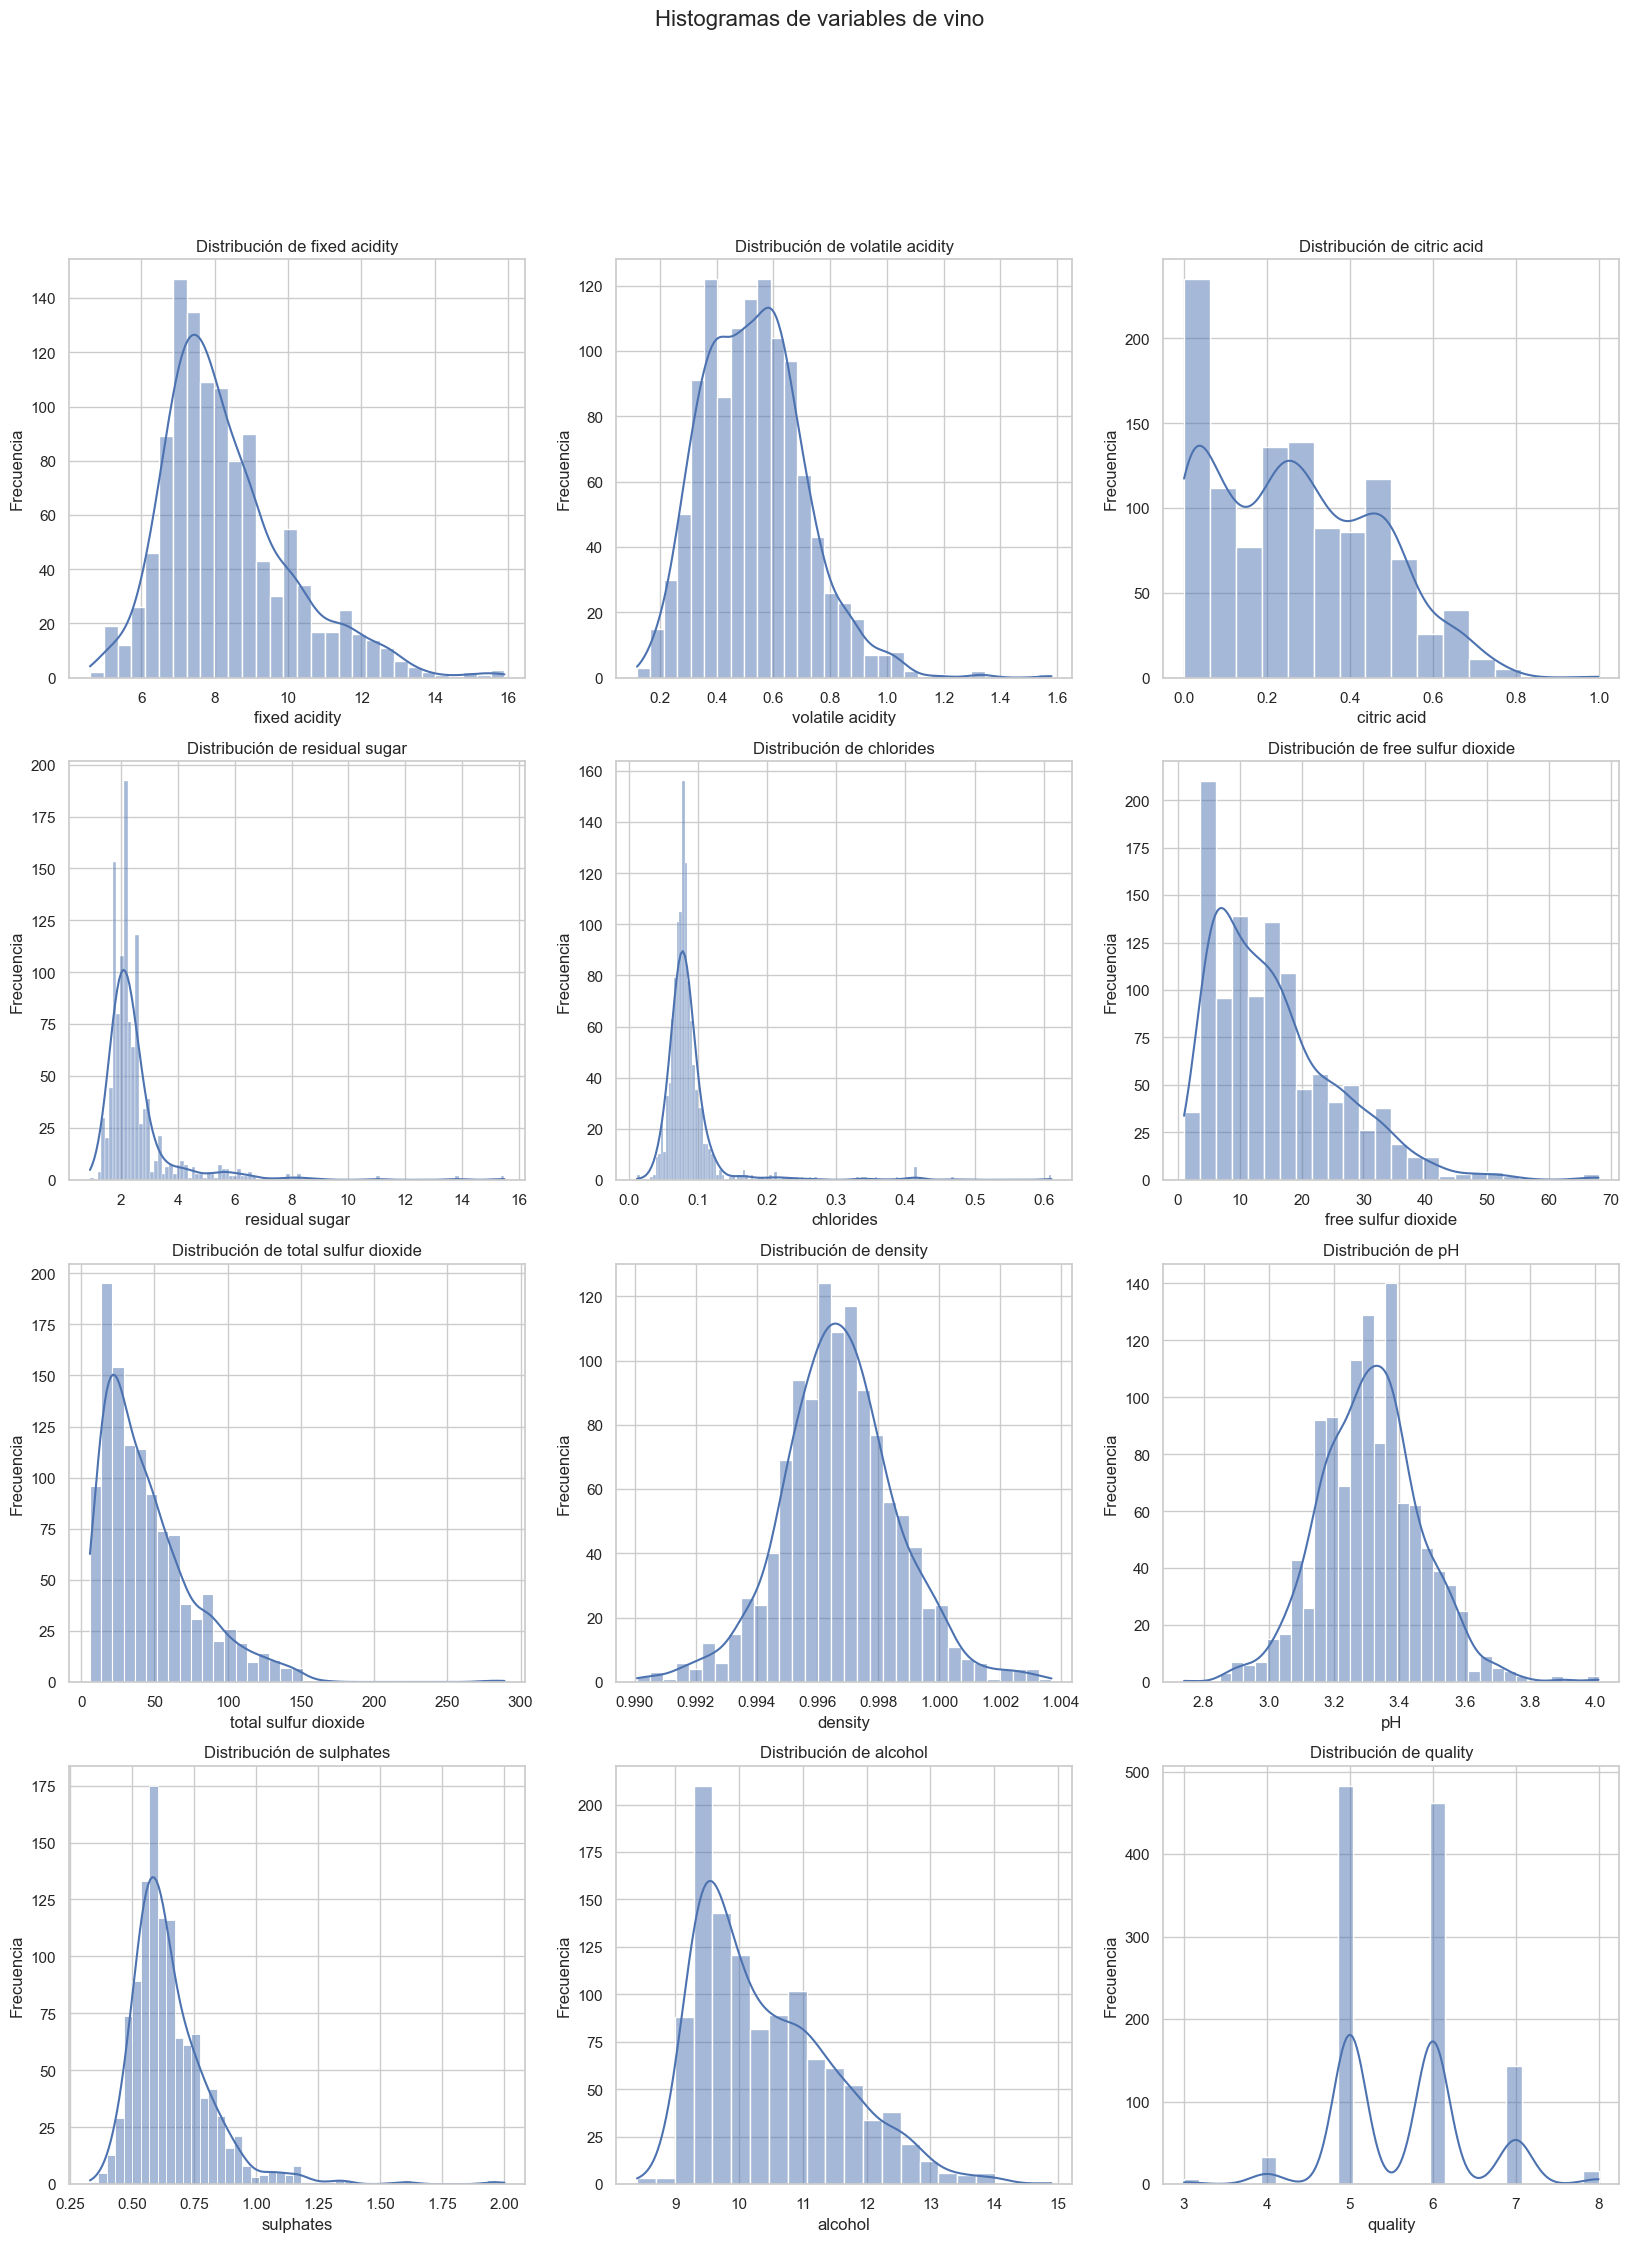

In [128]:
sns.set(style="whitegrid")

# Crear una figura con subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
fig.suptitle('Histogramas de variables de vino', fontsize=16)

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Crear un histograma para cada variable
for i, column in enumerate(data.columns[:]): 
    sns.histplot(data=data, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar los subplots vacíos
for i in range(len(data.columns) - 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [129]:
# Transformar la variable objetivo en binaria
data['quality_binary'] = (data['quality'] >= 6).astype(int)

# Mostrar las primeras filas para verificar la transformación
data[['quality', 'quality_binary']].head()
# Ver la distribución de los valores en 'quality_binary'
distribution = data['quality_binary'].value_counts()
print(distribution)

quality_binary
1    621
0    522
Name: count, dtype: int64


In [130]:
# Definir la función para eliminar outliers usando IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Lista de columnas relevantes para verificar outliers
columns_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [131]:
# Separar características (X) y variable objetivo (y)
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality_binary']  # Usar 'quality_binary' si estás realizando clasificación binaria

# Dividir en conjunto de entrenamiento (70%) y prueba/validación (30%) con estratificación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50, stratify=y)

# Dividir el conjunto de prueba/validación en prueba (50%) y validación (50%) con estratificación
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=50, stratify=y_temp)

# Mostrar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


Tamaño del conjunto de entrenamiento: 800
Tamaño del conjunto de validación: 171
Tamaño del conjunto de prueba: 172


Accuracy sin eliminar outliers: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



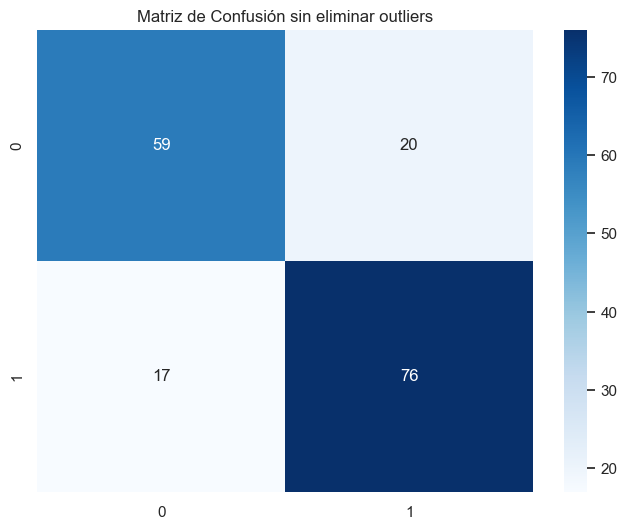

In [132]:
# Transformar la variable objetivo en binaria
from sklearn.preprocessing import MinMaxScaler
data['quality_binary'] = (data['quality'] >= 6).astype(int)

# División de datos sin eliminar outliers
X_train, X_val, y_train, y_val = train_test_split(X, data['quality_binary'], test_size=0.15, random_state=42,stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de validación
y_val_pred = logreg.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy sin eliminar outliers: {val_accuracy}")
print(classification_report(y_val, y_val_pred))

# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión sin eliminar outliers')
plt.show()


Accuracy eliminando outliers: 0.7176470588235294
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        82
           1       0.72      0.74      0.73        88

    accuracy                           0.72       170
   macro avg       0.72      0.72      0.72       170
weighted avg       0.72      0.72      0.72       170



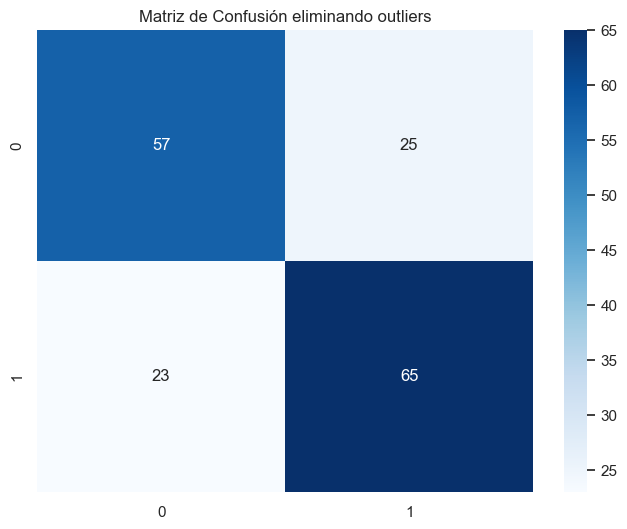

In [133]:
# Eliminar outliers en todas las columnas relevantes
for column in columns_to_check:
    data_clean = remove_outliers_iqr(data, column)


# Definir las características (X) y la variable objetivo (y) después de eliminar outliers
X_clean = data_clean.drop(columns=['quality', 'quality_binary'])  # Asegúrate de que estas columnas no estén en X
y_clean = data_clean['quality_binary']
# División de datos después de eliminar outliers
X_train_clean, X_val_clean, y_train_clean, y_val_clean = train_test_split(X_clean, data_clean['quality_binary'], test_size=0.15, random_state=42)

# Escalar los datos
X_train_clean_scaled = scaler.fit_transform(X_train_clean)
X_val_clean_scaled = scaler.transform(X_val_clean)

# Entrenar el modelo
logreg_clean = LogisticRegression(C=100)
logreg_clean.fit(X_train_clean_scaled, y_train_clean)

# Predicciones en el conjunto de validación
y_val_clean_pred = logreg_clean.predict(X_val_clean_scaled)
val_accuracy_clean = accuracy_score(y_val_clean, y_val_clean_pred)
print(f"Accuracy eliminando outliers: {val_accuracy_clean}")
print(classification_report(y_val_clean, y_val_clean_pred))

# Matriz de confusión
cm_clean = confusion_matrix(y_val_clean, y_val_clean_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_clean, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión eliminando outliers')
plt.show()


In [134]:
# Comparación de exactitudes
print(f"Accuracy sin outliers: {val_accuracy}")
print(f"Accuracy con outliers eliminados: {val_accuracy_clean}")


Accuracy sin outliers: 0.7848837209302325
Accuracy con outliers eliminados: 0.7176470588235294


Exactitud con k=1: 0.5988372093023255
              precision    recall  f1-score   support

           0       0.61      0.34      0.44        79
           1       0.59      0.82      0.69        93

    accuracy                           0.60       172
   macro avg       0.60      0.58      0.56       172
weighted avg       0.60      0.60      0.57       172



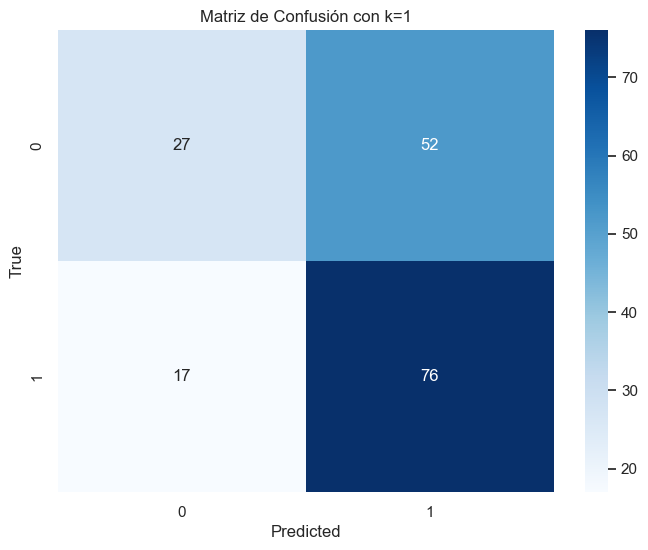

Exactitud con k=2: 0.5988372093023255
              precision    recall  f1-score   support

           0       0.60      0.37      0.46        79
           1       0.60      0.80      0.68        93

    accuracy                           0.60       172
   macro avg       0.60      0.58      0.57       172
weighted avg       0.60      0.60      0.58       172



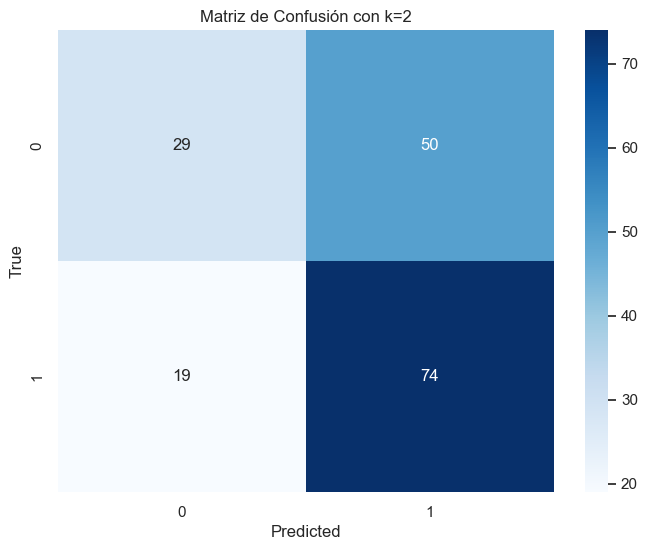

Exactitud con k=3: 0.7034883720930233
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        79
           1       0.72      0.73      0.73        93

    accuracy                           0.70       172
   macro avg       0.70      0.70      0.70       172
weighted avg       0.70      0.70      0.70       172



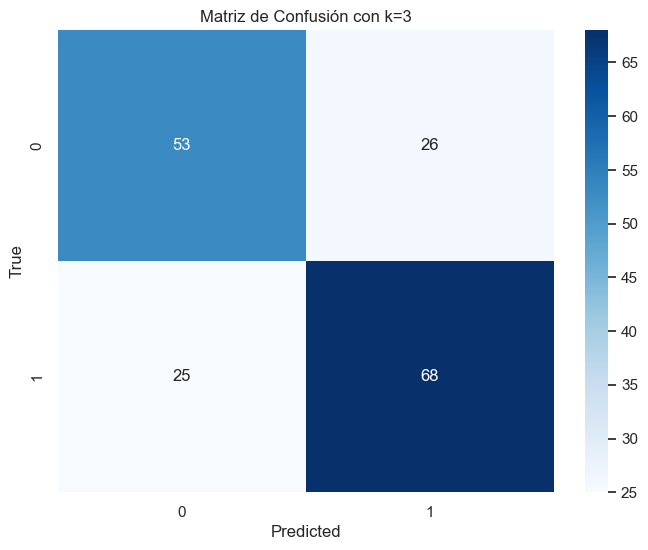

Exactitud con k=4: 0.7732558139534884
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        79
           1       0.79      0.78      0.79        93

    accuracy                           0.77       172
   macro avg       0.77      0.77      0.77       172
weighted avg       0.77      0.77      0.77       172



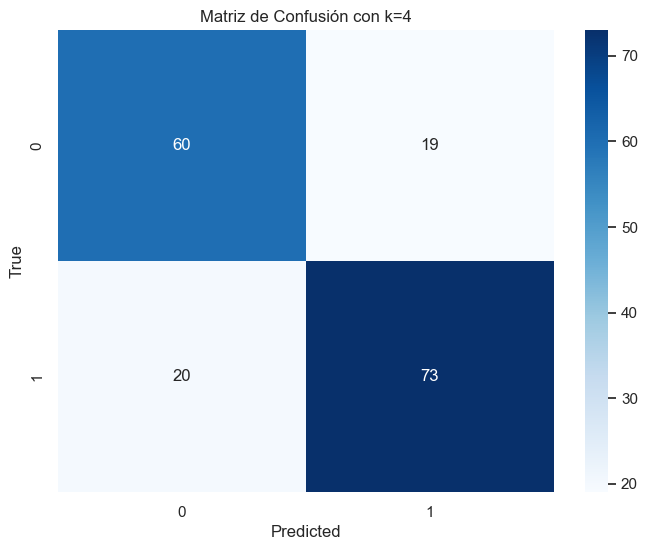

Exactitud con k=5: 0.7732558139534884
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        79
           1       0.79      0.78      0.79        93

    accuracy                           0.77       172
   macro avg       0.77      0.77      0.77       172
weighted avg       0.77      0.77      0.77       172



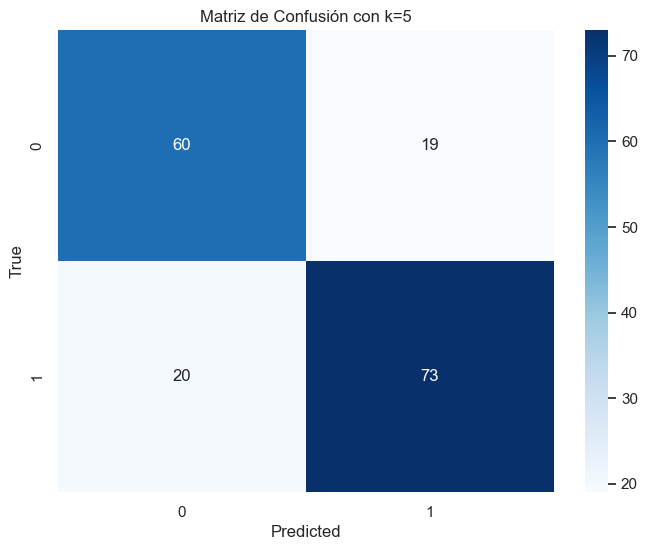

Exactitud con k=6: 0.7616279069767442
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        79
           1       0.78      0.78      0.78        93

    accuracy                           0.76       172
   macro avg       0.76      0.76      0.76       172
weighted avg       0.76      0.76      0.76       172



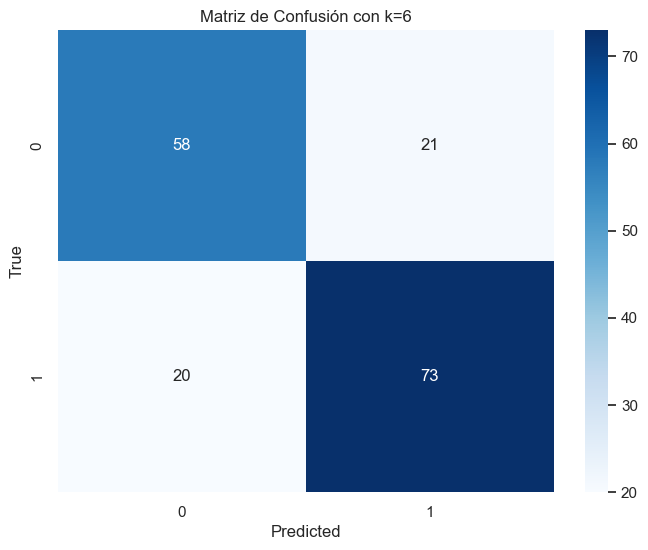

Exactitud con k=7: 0.7790697674418605
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        79
           1       0.79      0.81      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



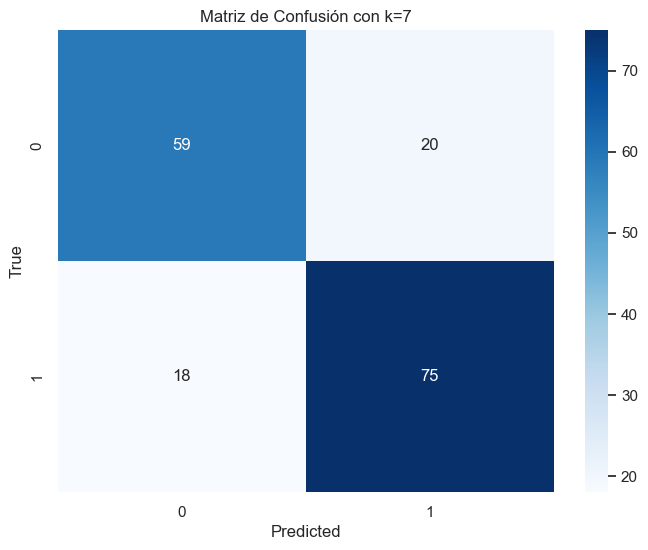

Exactitud con k=8: 0.7790697674418605
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        79
           1       0.79      0.81      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



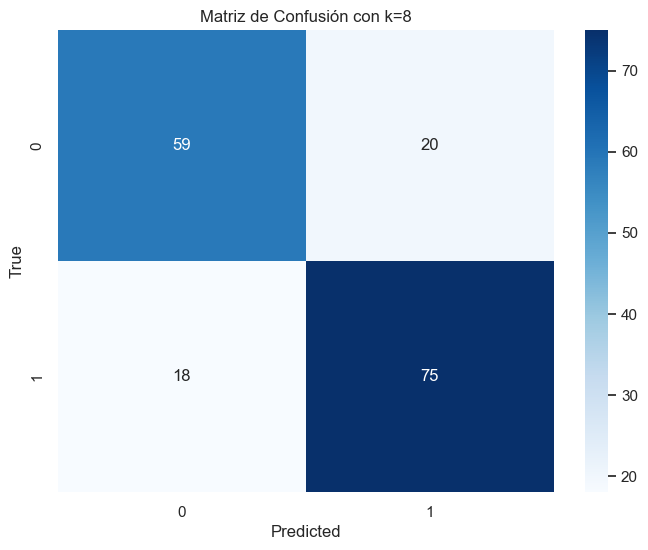

Exactitud con k=9: 0.7732558139534884
              precision    recall  f1-score   support

           0       0.76      0.75      0.75        79
           1       0.79      0.80      0.79        93

    accuracy                           0.77       172
   macro avg       0.77      0.77      0.77       172
weighted avg       0.77      0.77      0.77       172



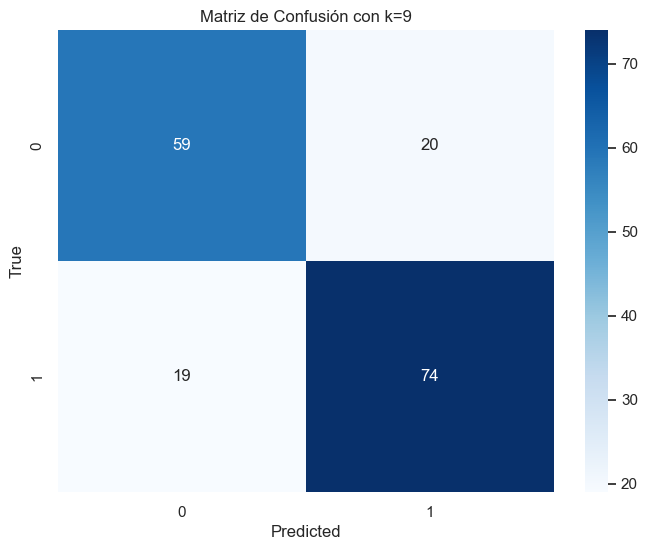

Exactitud con k=10: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



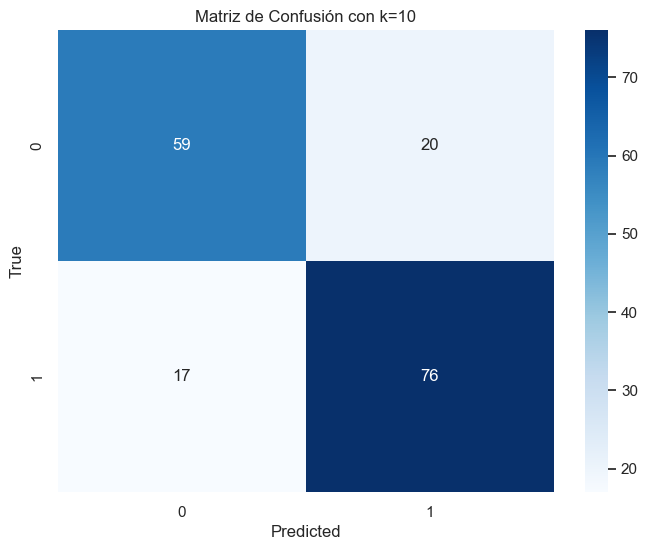

Exactitud con k=11: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



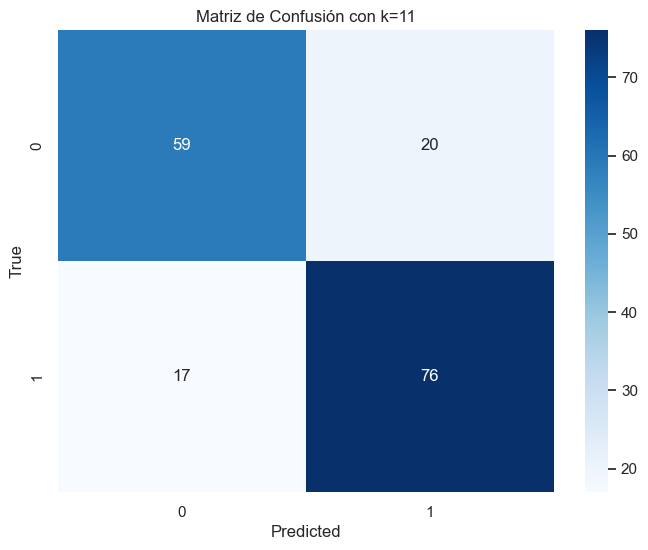

Resultados de exactitud para cada valor de k: {1: 0.5988372093023255, 2: 0.5988372093023255, 3: 0.7034883720930233, 4: 0.7732558139534884, 5: 0.7732558139534884, 6: 0.7616279069767442, 7: 0.7790697674418605, 8: 0.7790697674418605, 9: 0.7732558139534884, 10: 0.7848837209302325, 11: 0.7848837209302325}


In [135]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de valores de k que deseas probar
k_values = [1,2,3,4,5,6,7,8,9,10,11]  # Puedes ajustar esta lista según prefieras
results = {}

# Bucle para probar diferentes valores de k
for k in k_values:
    # Selección de características utilizando Chi-Cuadrado
    chi2_selector = SelectKBest(chi2, k=k)
    X_train_best = chi2_selector.fit_transform(X_train, y_train)
    X_val_best = chi2_selector.transform(X_val)
    X_test_best = chi2_selector.transform(X_test)
    
    # Escalar los datos
    scaler = StandardScaler()
    X_train_best_scaled = scaler.fit_transform(X_train_best)
    X_val_best_scaled = scaler.transform(X_val_best)
    X_test_best_scaled = scaler.transform(X_test_best)
    
    # Entrenar el modelo
    logreg = LogisticRegression()
    logreg.fit(X_train_best_scaled, y_train)
    
    # Validación en el conjunto de validación
    y_val_pred = logreg.predict(X_val_best_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Guardar los resultados
    results[k] = val_accuracy
    
    # Mostrar el valor de k y la exactitud
    print(f"Exactitud con k={k}: {val_accuracy}")
    
    # Mostrar reporte de clasificación
    print(classification_report(y_val, y_val_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión con k={k}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Mostrar resultados finales
print("Resultados de exactitud para cada valor de k:", results)


Exactitud con C=0.01: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



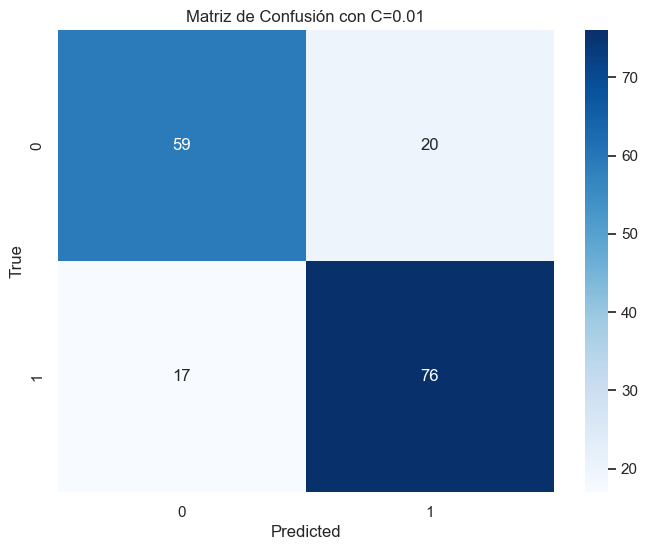

Exactitud con C=0.1: 0.7790697674418605
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        79
           1       0.78      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



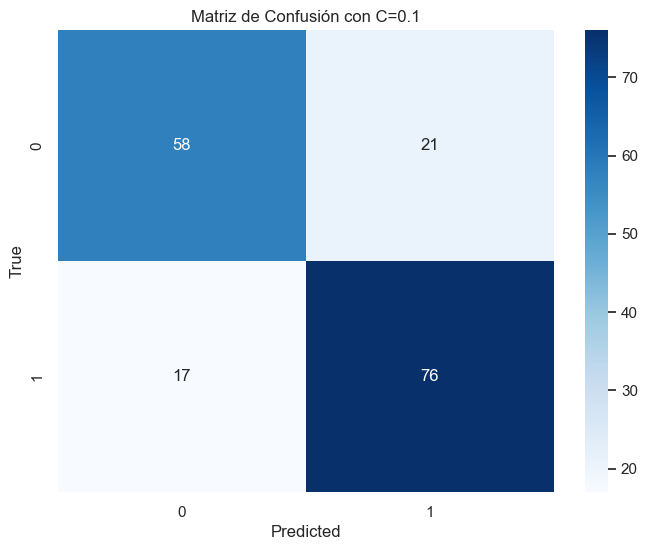

Exactitud con C=1: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



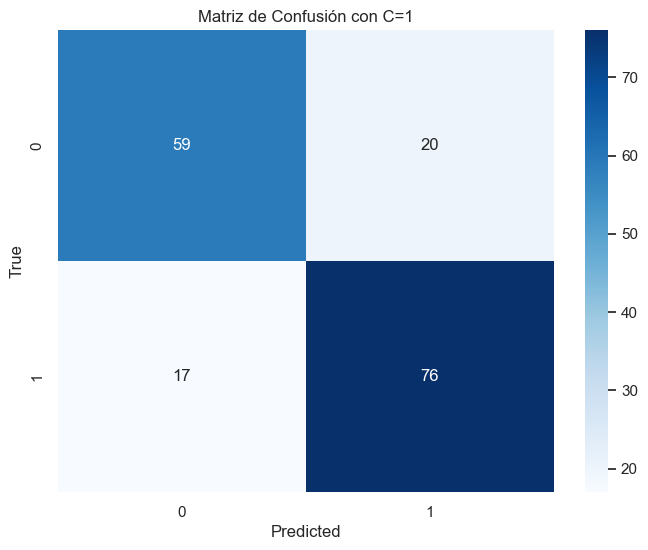

Exactitud con C=10: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



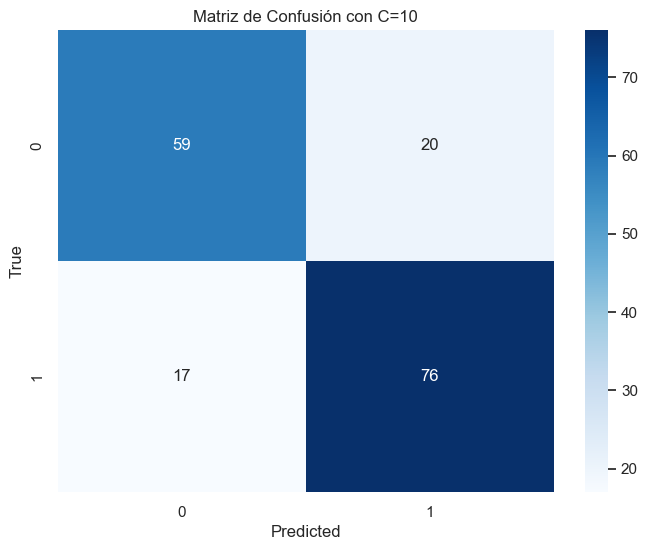

Exactitud con C=100: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



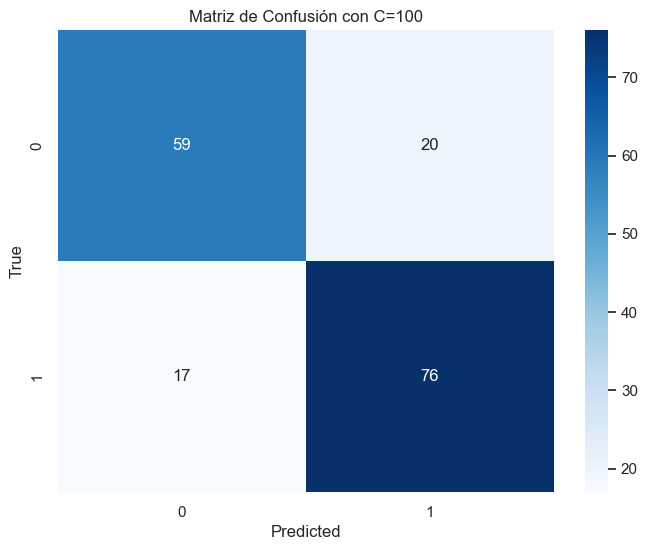

Resultados de exactitud para cada valor de C: {0.01: 0.7848837209302325, 0.1: 0.7790697674418605, 1: 0.7848837209302325, 10: 0.7848837209302325, 100: 0.7848837209302325}


In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de valores de C que deseas probar
C_values = [0.01, 0.1, 1, 10, 100]  # Puedes ajustar estos valores según prefieras
results_C = {}

# Bucle para probar diferentes valores de C con las características seleccionadas
for C in C_values:
    # Entrenar el modelo con el valor de C actual y las características seleccionadas
    logreg = LogisticRegression(C=C)
    logreg.fit(X_train_best_scaled, y_train)
    
    # Validación en el conjunto de validación
    y_val_pred = logreg.predict(X_val_best_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Guardar los resultados
    results_C[C] = val_accuracy
    
    # Mostrar el valor de C y la exactitud
    print(f"Exactitud con C={C}: {val_accuracy}")
    
    # Mostrar reporte de clasificación
    print(classification_report(y_val, y_val_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión con C={C}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Mostrar resultados finales
print("Resultados de exactitud para cada valor de C:", results_C)



Exactitud con solver=liblinear, penalty=l2, max_iter=100: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



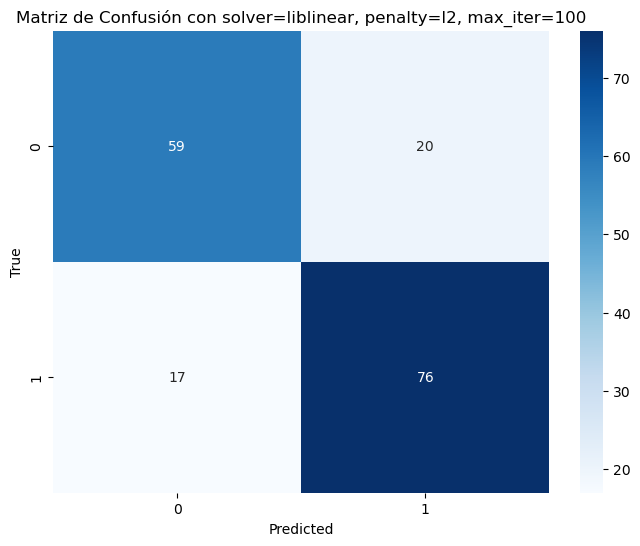

Exactitud con solver=liblinear, penalty=l2, max_iter=200: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



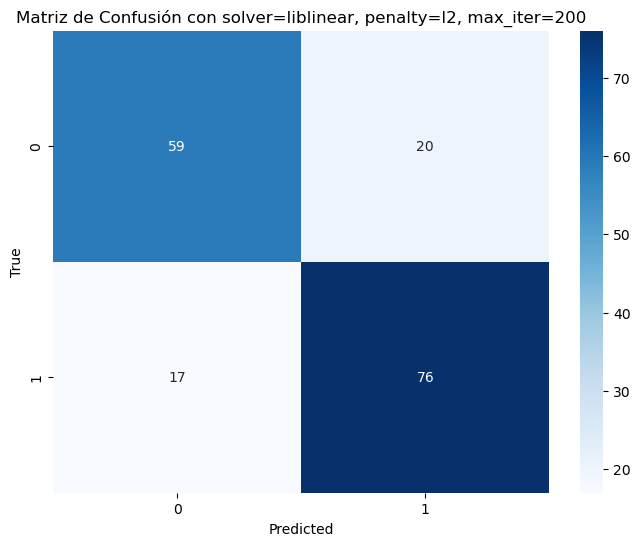

Exactitud con solver=liblinear, penalty=l2, max_iter=300: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



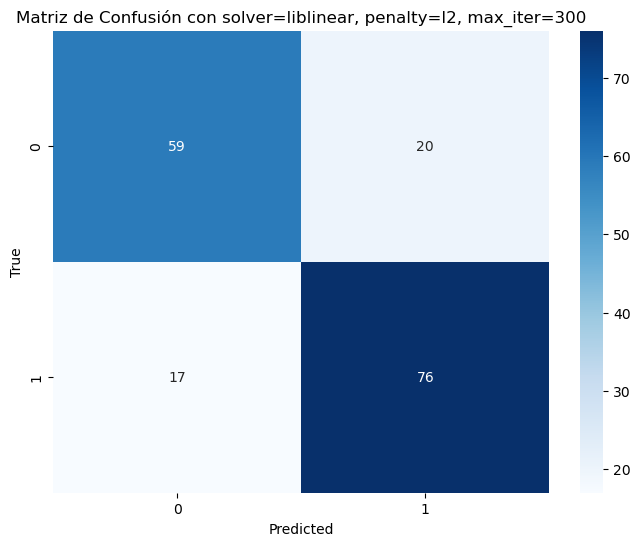

Error con solver=liblinear, penalty=none, max_iter=100: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=liblinear, penalty=none, max_iter=200: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=liblinear, penalty=none, max_iter=300: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Exactitud con solver=lbfgs, penalty=l2, max_iter=100: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



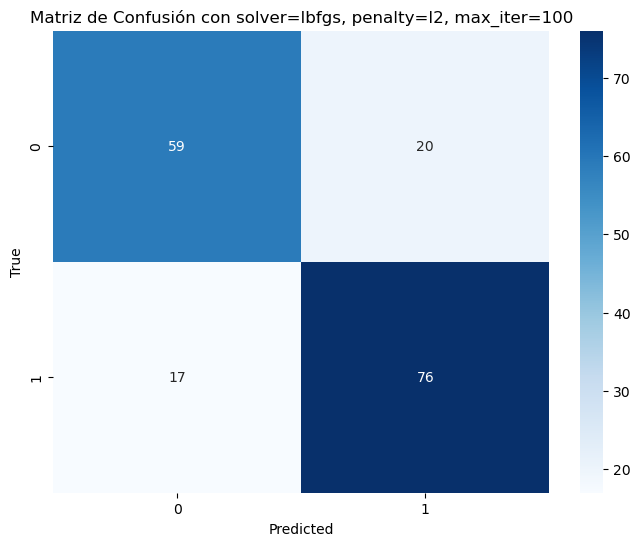

Exactitud con solver=lbfgs, penalty=l2, max_iter=200: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



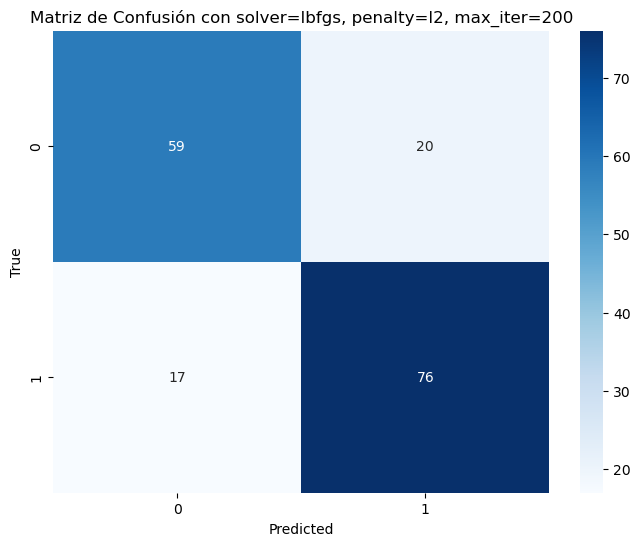

Exactitud con solver=lbfgs, penalty=l2, max_iter=300: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



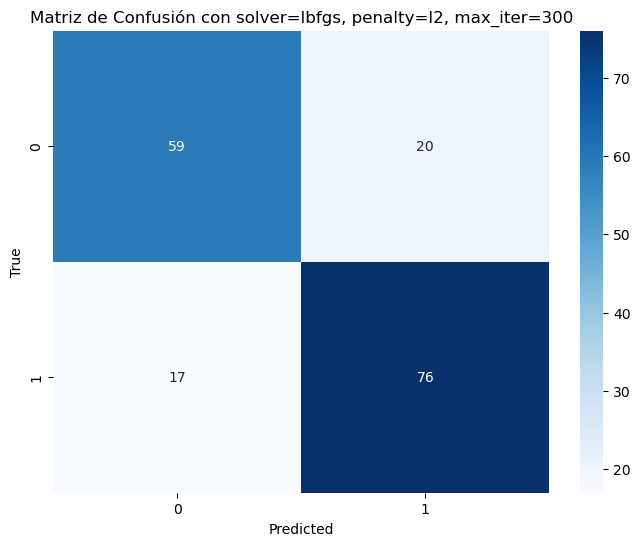

Error con solver=lbfgs, penalty=none, max_iter=100: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=lbfgs, penalty=none, max_iter=200: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=lbfgs, penalty=none, max_iter=300: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Exactitud con solver=newton-cg, penalty=l2, max_iter=100: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



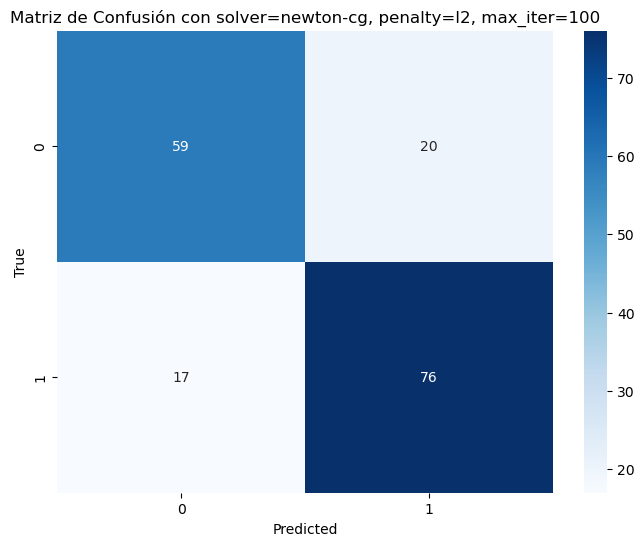

Exactitud con solver=newton-cg, penalty=l2, max_iter=200: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



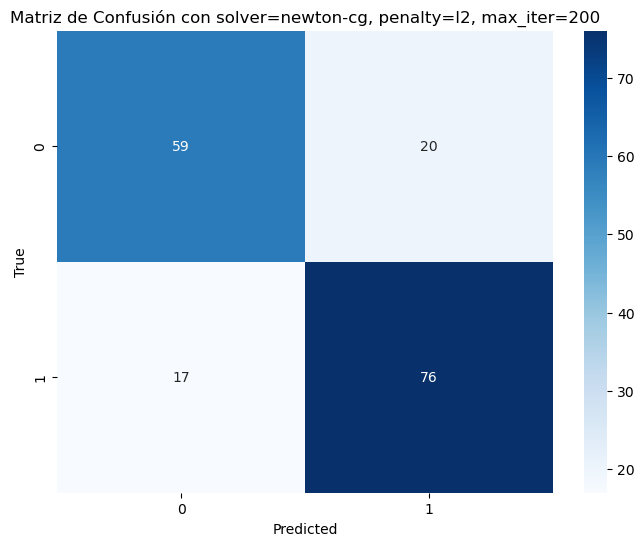

Exactitud con solver=newton-cg, penalty=l2, max_iter=300: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



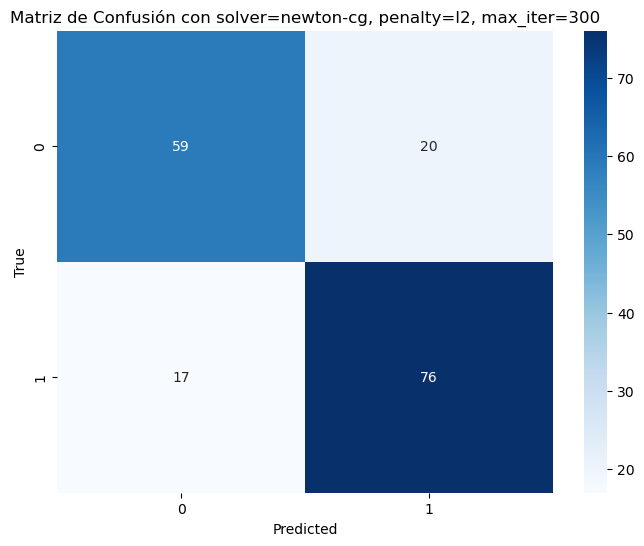

Error con solver=newton-cg, penalty=none, max_iter=100: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=newton-cg, penalty=none, max_iter=200: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=newton-cg, penalty=none, max_iter=300: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Exactitud con solver=saga, penalty=l2, max_iter=100: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



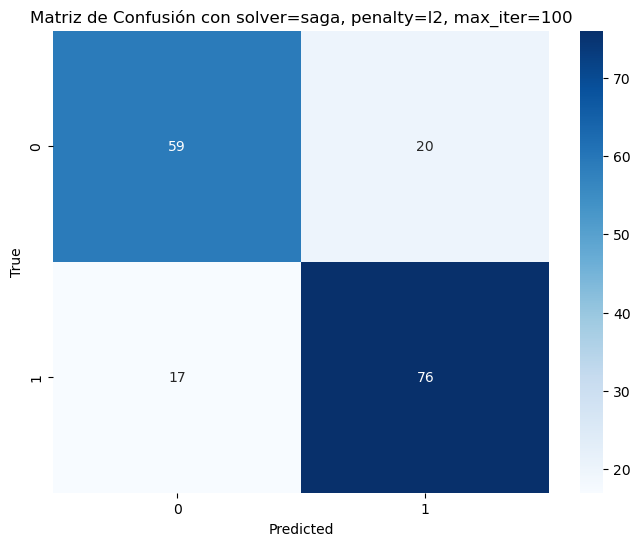

Exactitud con solver=saga, penalty=l2, max_iter=200: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



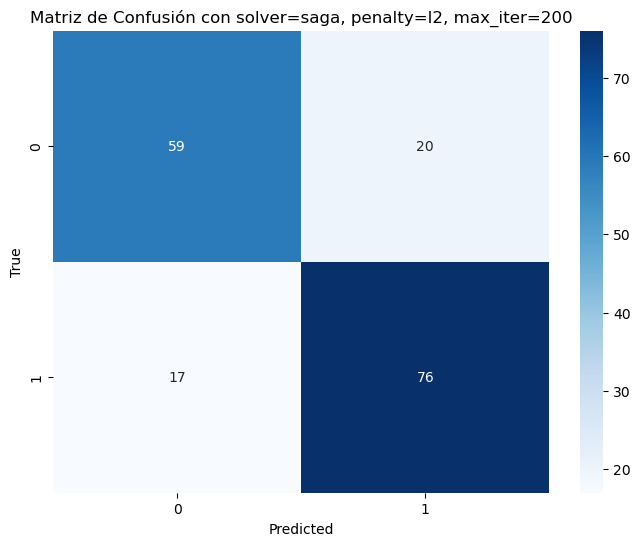

Exactitud con solver=saga, penalty=l2, max_iter=300: 0.7848837209302325
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        79
           1       0.79      0.82      0.80        93

    accuracy                           0.78       172
   macro avg       0.78      0.78      0.78       172
weighted avg       0.78      0.78      0.78       172



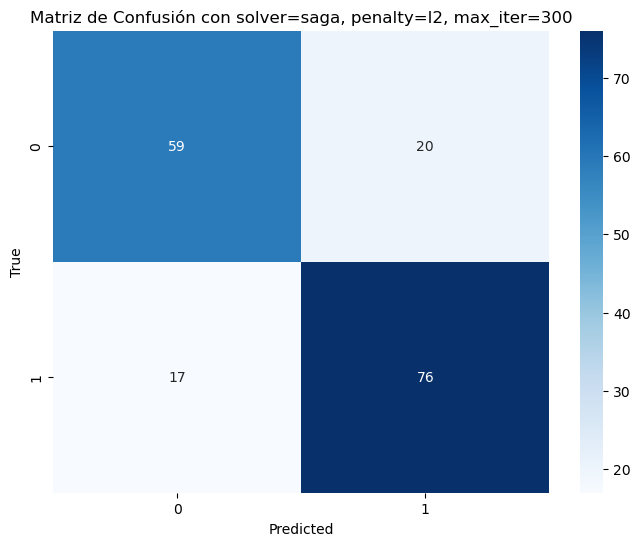

Error con solver=saga, penalty=none, max_iter=100: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=saga, penalty=none, max_iter=200: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Error con solver=saga, penalty=none, max_iter=300: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Resultados de exactitud para cada combinación de hiperparámetros: {('liblinear', 'l2', 100): 0.7848837209302325, ('liblinear', 'l2', 200): 0.7848837209302325, ('liblinear', 'l2', 300): 0.7848837209302325, ('lbfgs', 'l2', 100): 0.7848837209302325, ('lbfgs', 'l2', 200): 0.7848837209302325, ('lbfgs', 'l2', 300): 0.7848837209302325, ('newton-cg', 'l2', 100): 0.7848837209302325, ('newton-cg', 'l2', 200): 0.7848837209302325, ('newton-cg', 'l2', 300): 0.7848837209302325, ('saga', 'l2

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de hiperparámetros a probar
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'saga']
penalties = ['l2', 'none']  # 'l1' no está disponible para todos los solvers, por eso se limita aquí
max_iters = [100, 200, 300]

results_hp = {}

# Bucle para probar diferentes combinaciones de solver, penalty y max_iter
for solver in solvers:
    for penalty in penalties:
        for max_iter in max_iters:
            try:
                # Crear y entrenar el modelo con los hiperparámetros actuales
                logreg = LogisticRegression(solver=solver, penalty=penalty, max_iter=max_iter)
                logreg.fit(X_train_best_scaled, y_train)

                # Validación en el conjunto de validación
                y_val_pred = logreg.predict(X_val_best_scaled)
                val_accuracy = accuracy_score(y_val, y_val_pred)

                # Guardar los resultados
                results_hp[(solver, penalty, max_iter)] = val_accuracy

                # Mostrar el valor de los hiperparámetros y la exactitud
                print(f"Exactitud con solver={solver}, penalty={penalty}, max_iter={max_iter}: {val_accuracy}")

                # Mostrar reporte de clasificación
                print(classification_report(y_val, y_val_pred))

                # Matriz de confusión
                cm = confusion_matrix(y_val, y_val_pred)
                plt.figure(figsize=(8,6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
                plt.title(f'Matriz de Confusión con solver={solver}, penalty={penalty}, max_iter={max_iter}')
                plt.xlabel('Predicted')
                plt.ylabel('True')
                plt.show()
            except Exception as e:
                print(f"Error con solver={solver}, penalty={penalty}, max_iter={max_iter}: {e}")

# Mostrar los mejores resultados
print("Resultados de exactitud para cada combinación de hiperparámetros:", results_hp)


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# Seleccionar las mejores características usando Chi-Cuadrado
chi2_selector = SelectKBest(chi2, k=10)
X_train_best = chi2_selector.fit_transform(X_train, y_train)
X_val_best = chi2_selector.transform(X_val)
X_test_best = chi2_selector.transform(X_test)

# Escalar los datos
scaler = StandardScaler()
X_train_best_scaled = scaler.fit_transform(X_train_best)
X_val_best_scaled = scaler.transform(X_val_best)
X_test_best_scaled = scaler.transform(X_test_best)

# Crear el modelo de Regresión Logística
logreg = LogisticRegression()

# Aplicar validación cruzada con 5 pliegues
cv_scores = cross_val_score(logreg, X_train_best_scaled, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados
print("Scores de validación cruzada:", cv_scores)
print("Media de exactitud:", cv_scores.mean())
print("Desviación estándar de la exactitud:", cv_scores.std())


Scores de validación cruzada: [0.71282051 0.77319588 0.78350515 0.7628866  0.72680412]
Media de exactitud: 0.7518424530795664
Desviación estándar de la exactitud: 0.027313360275109628


In [90]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Entrenar el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_best_scaled, y_train)

# Evaluar el rendimiento en el conjunto de validación
y_val_pred = logreg.predict(X_val_best_scaled)
initial_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Exactitud inicial en el conjunto de validación: {initial_accuracy:.4f}")

# Calcular la importancia de características por permutación
result = permutation_importance(logreg, X_val_best_scaled, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Crear un DataFrame con los resultados
# Utiliza el índice correcto para las características seleccionadas
feature_names = X_train.columns[chi2_selector.get_support()]
importance_perm = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)

# Mostrar la importancia de características
print("Importancia de características usando el método de permutación:")
print(importance_perm)


Exactitud inicial en el conjunto de validación: 0.7849
Importancia de características usando el método de permutación:
alcohol                 0.162209
volatile acidity        0.079070
sulphates               0.041860
total sulfur dioxide    0.022674
citric acid             0.012791
pH                      0.012791
chlorides               0.008140
fixed acidity           0.007558
free sulfur dioxide     0.005233
residual sugar         -0.001163
dtype: float64


In [91]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Aplicar PCA
pca = PCA(n_components=10)  # Puedes ajustar el número de componentes
X_train_pca = pca.fit_transform(X_train_best_scaled)
X_val_pca = pca.transform(X_val_best_scaled)
X_test_pca = pca.transform(X_test_best_scaled)

# Crear y entrenar el modelo de Regresión Logística
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)

# Evaluar el rendimiento en el conjunto de validación
y_val_pred_pca = logreg_pca.predict(X_val_pca)
pca_accuracy = accuracy_score(y_val, y_val_pred_pca)
print(f"Exactitud del modelo con PCA en el conjunto de validación: {pca_accuracy:.4f}")


Exactitud del modelo con PCA en el conjunto de validación: 0.7849


Exactitud con k=11: 0.8197674418604651
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        79
           1       0.84      0.83      0.83        93

    accuracy                           0.82       172
   macro avg       0.82      0.82      0.82       172
weighted avg       0.82      0.82      0.82       172



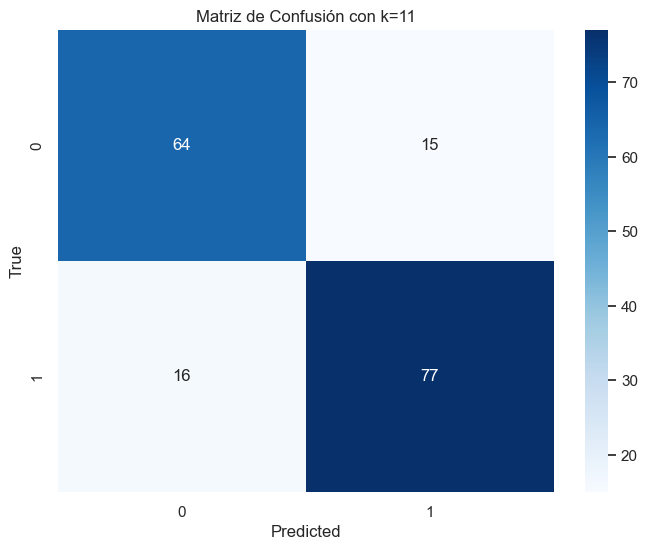

In [137]:
    # Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train_best_scaled, y_train)
    
    # Validación en el conjunto de validación
y_test_pred = logreg.predict(X_test_best_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
    # Guardar los resultados
    
    # Mostrar el valor de k y la exactitud
print(f"Exactitud con k={k}: {test_accuracy}")
    
    # Mostrar reporte de clasificación
print(classification_report(y_test, y_test_pred))
    
    # Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión con k={k}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()